In [ ]:
import os
os.chdir(os.path.expanduser(os.getcwd()))
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# 'GT0351005', 'GT0918001', 'GT0925002', 'GT1067015', 'GT1213007',
#        'GT1519900', 'GT1541007', 'GT1578027', 'GT1586034', 'GT1931012',
#        'GT2216002', 'GT2224006', 'GT2290014', 'GT2626900', 'GT2642900',
#        'GT2747021', 'GT2764030', 'GT3029004', 'GT3551010', 'GT3813009',
#        'GT4712001', 'GT4764007', 'GT4802002', 'GT4977004', 'GT5883030',
#        'GT6123019', 'GT6459900', 'GT6852001', 'GT7536006', 'GT7587900',
#        'GT7857001', 'GT8549900', 'GT8889023', 'GT9141014', 'GT9162023',
#        'GT9451004'

In [16]:
excluded_stations = ['GT0351005',  'GT1067015', 'GT1213007',
       'GT1519900', 'GT1541007', 'GT1586034', 'GT2290014',
       'GT2626900', 'GT2642900', 'GT6123019', 'GT2216002',
       'GT3813009', 'GT9162023', 'GT5883030', 'GT1578027',
       'GT4712001', 'GT4764007', 'GT4802002', 'GT1931012',
       'GT6459900', 'GT7587900', 'GT3029004', 'GT2224006',
       'GT7857001', 'GT8889023', 'GT9141014', 'GT2764030',
       'GT811012B', 'GT8407001', 'GT7536006']

path_station = r"F:\Reanalysis Data\Monthly\Observed"
# Directory containing the reanalysis NetCDF files
path_reanalysis = r"F:\Reanalysis Data\Monthly\Reanalysis"
# Directory containing the gcm NetCDF files
path_gcm = r"F:\Reanalysis Data\Monthly\GCM\ACCESS ESM 15\historical"

station_paths = []

for path in os.listdir(path_station):
    # Only add the file if none of the excluded IDs are in the filename
    if not any(id in path for id in excluded_stations):
        station_paths.append(os.path.join(path_station, path))

In [17]:
from modules import wrangle

stations_data_list = []

for path_df in station_paths:
    dfs = wrangle(path_df, path_reanalysis, path_gcm)
    stations_data_list.append(dfs)

In [18]:
station_stats = []

for dfs in stations_data_list:
    df = dfs[0]
    data = {}
    data['District'] = df['DISTRICT'].iloc[0]
    data['Upaliza'] = df['UPAZILA'].iloc[0]
    data['Well Id'] = df['WELL ID'].iloc[0]
    data['lat'] = df['LATITUDE'].iloc[0]
    data['lon'] = df['LONGITUDE'].iloc[0]
    data['range'] = f"{df['WATER TABLE (m)'].dropna().index.min().year} - {df['WATER TABLE (m)'].dropna().index.max().year}"
    data['obs_mean'] = df['WATER TABLE (m)'].mean()
    data['obs_std'] = df['WATER TABLE (m)'].std()
    data['obs_min'] = df['WATER TABLE (m)'].min()
    data['obs_max'] = df['WATER TABLE (m)'].max()
    station_stats.append(data)
    print("✅ Done processing", df['DISTRICT'].iloc[0], df['UPAZILA'].iloc[0])

stats = pd.DataFrame(station_stats) 

✅ Done processing Barguna Bamna
✅ Done processing Bhola Bhola Sadar
✅ Done processing Bhola Char Fasson
✅ Done processing Brahmanbaria Brahamanbaria Sadar
✅ Done processing Chandpur Chandpur Sadar
✅ Done processing Cumilla Cumilla Sadar
✅ Done processing Dinajpur Hakimpur
✅ Done processing Faridpur Faridpur Sadar 
✅ Done processing Faridpur Faridpur Sadar 
✅ Done processing Gaibandha Sadullapur
✅ Done processing Gopalganj Kotali para
✅ Done processing Jamalpur Jamalpur Sadar
✅ Done processing Jessore Jessore Sadar
✅ Done processing Khulna Khulna Sadar
✅ Done processing Kishoreganj Itna
✅ Done processing Kurigram Rajarhat
✅ Done processing Kushtia Bheramara
✅ Done processing Madaripur Kalkini
✅ Done processing Meherpur Meherpur Sadar
✅ Done processing Mymensingh Mymensingh Sadar
✅ Done processing Narsingdi Manohardi
✅ Done processing Pabna Pabna Sadar
✅ Done processing Pirojpur Kawkhali
✅ Done processing Rajshahi Paba
✅ Done processing Rangpur Rangpur Sadar
✅ Done processing Sirajganj S

In [20]:
stats.round({'obs_mean': 2, 'obs_std': 2, 'obs_min': 2, 'obs_max': 2}).set_index('Well Id').to_csv(r"C:\Users\Acer\Desktop\Thesis\Meeting 05\Final paper\Stats\observed_station_stats.csv", index=True)

In [21]:
stations_data_list[0][1].columns

Index(['air', 'prate', 'pres', 'shum', 'tmax', 'tmin'], dtype='object')

In [22]:
from modules import monthly_mean_imputer

for dfs in stations_data_list:
    df = dfs[0]
    dfs[1]['wtable'] = monthly_mean_imputer(df['WATER TABLE (m)'])

In [23]:
corr = []
for dfs in stations_data_list:
    df = dfs[1]
    data = df.corr()['wtable'].round(2).to_dict()
    data['District'] = dfs[0]['DISTRICT'].iloc[0]
    data['Upaliza'] = dfs[0]['UPAZILA'].iloc[0]
    data['Well Id'] = dfs[0]['WELL ID'].iloc[0]
    corr.append(data)

In [24]:
corr_df = pd.DataFrame(corr)
corr_df.set_index('Well Id')[['District', 'Upaliza','wtable', 'air', 'prate', 'pres', 'shum', 'tmax', 'tmin']].to_csv(r"C:\Users\Acer\Desktop\Thesis\Meeting 05\Final paper\Stats\observed_station_corr.csv", index=True)

In [27]:
len(stations_data_list)

32

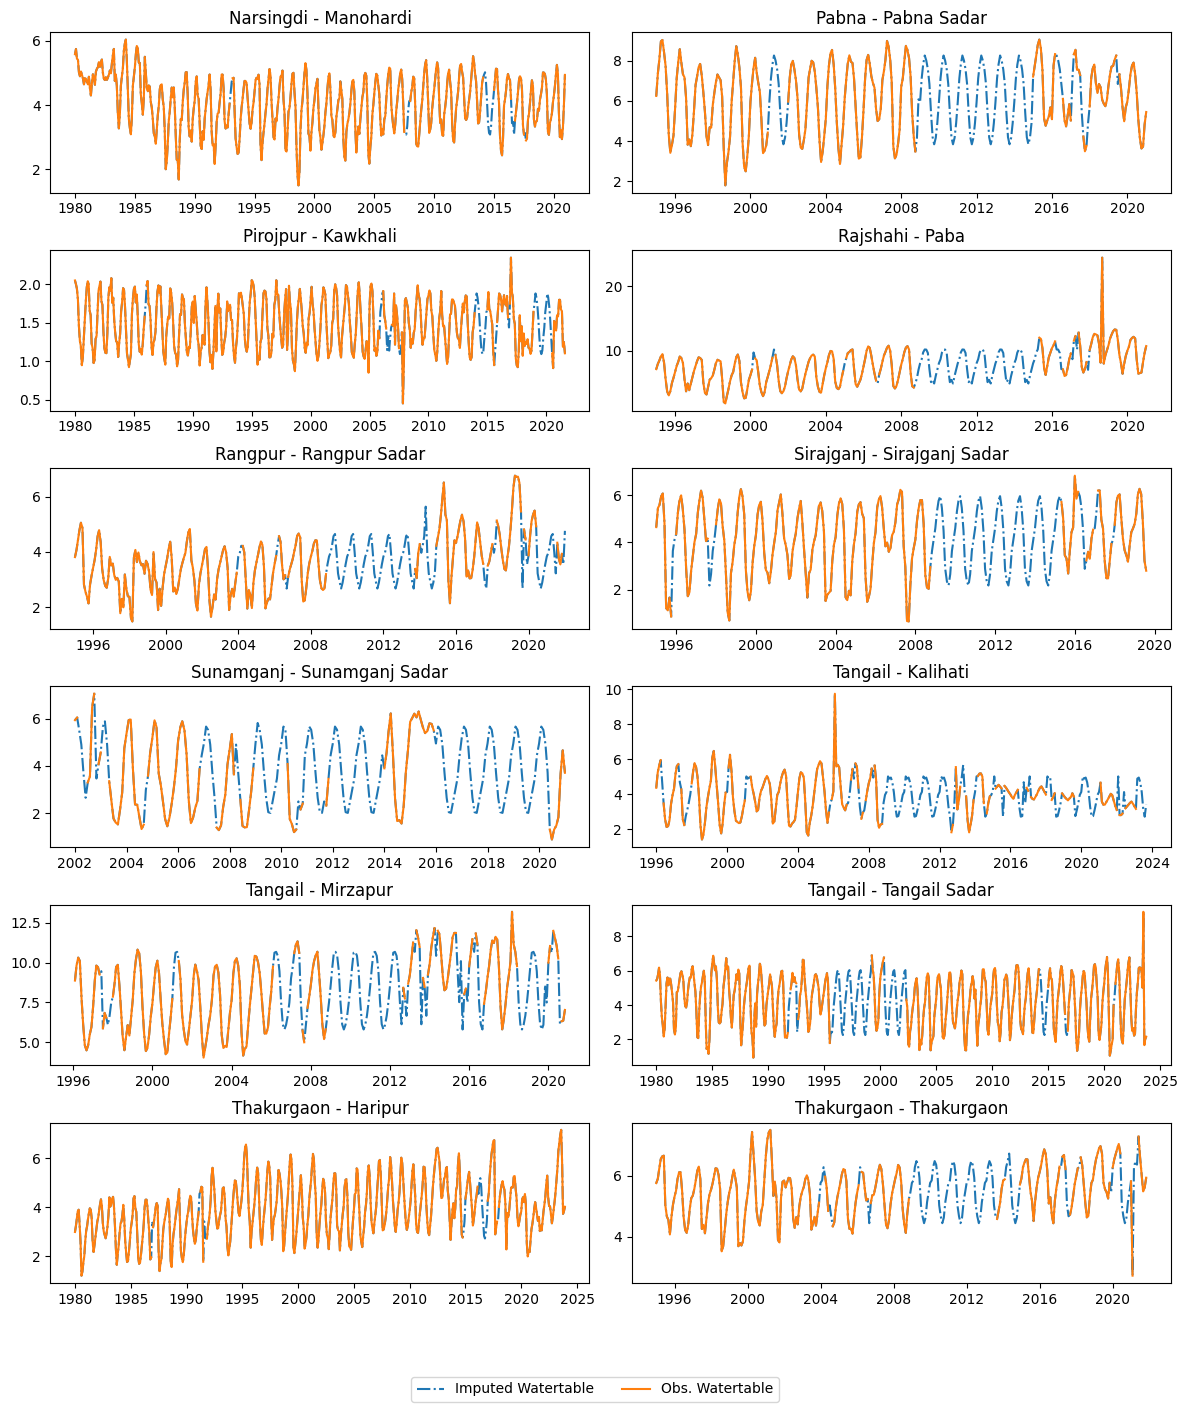

In [35]:
fig, ax = plt.subplots(figsize=(12, 14), ncols=2, nrows=len(stations_data_list[20:])//2)
ax = ax.flatten()

lines = []
labels = []

for i, dfs in enumerate(stations_data_list[20:]):
    df = dfs[0]
    df = df.rename(columns={'WATER TABLE (m)': 'Obs. Watertable', 'wtable': 'Imputed Watertable'})
    # Plot imputed watertable
    imputed_line = ax[i].plot(monthly_mean_imputer(df['Obs. Watertable']), '-.', label='Imputed Watertable')[0]
    # Plot observed watertable
    obs_line = ax[i].plot(df['Obs. Watertable'].resample('MS').mean(), label='Obs. Watertable')[0]
    ax[i].set_title(f"{df['DISTRICT'].iloc[0]} - {df['UPAZILA'].iloc[0]}")
    if i == 0:
        lines.extend([imputed_line, obs_line])
        labels.extend(['Imputed Watertable', 'Obs. Watertable'])

plt.tight_layout()
fig.legend(lines, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.01))
plt.subplots_adjust(bottom=0.08)

In [36]:
stations_data_list[0][0].columns

Index(['DISTRICT', 'UPAZILA', 'WELL ID', 'OLD ID', 'WATER TABLE (m)',
       'RL PARAPET (m)', 'PARAPET HEIGHT (m)', 'DEPTH (m)', 'LATITUDE',
       'LONGITUDE'],
      dtype='object', name=8)

In [85]:
import pymannkendall as mk

results = []

for dfs in stations_data_list:
    data = {}
    df = monthly_mean_imputer(dfs[0]['WATER TABLE (m)'])
    result = mk.original_test(df)
    
    data['Well Id'] = dfs[0]['WELL ID'].iloc[0]
    data['District'] = dfs[0]['DISTRICT'].iloc[0]
    if dfs[0]['UPAZILA'].iloc[0] == 'Mirzapur':
        data['lat'] = 24.1053
        data['lon'] = 90.1051
    else:
        data['lat'] = dfs[0]['LATITUDE'].iloc[0]
        data['lon'] = dfs[0]['LONGITUDE'].iloc[0]
        
    data['Upaliza'] = dfs[0]['UPAZILA'].iloc[0]
    data['trend'] = result.trend
    data['h'] = result.h
    data['p'] = result.p
    data['z'] = result.z
    data['Tau'] = result.Tau
    data['slope'] = result.slope
    data['intercept'] = result.intercept
    data['var'] = result.var_s
    
    results.append(data)

results_df = pd.DataFrame(results)

In [86]:
results_df.set_index('Well Id').to_csv(r"C:\Users\Acer\Desktop\Thesis\Meeting 05\Final paper\Stats\observed_station_trend.csv", index=True)

In [87]:
import pymannkendall as mk

results = []

for dfs in stations_data_list:
    data = {}
    df = monthly_mean_imputer(dfs[0]['WATER TABLE (m)'])
    result = mk.seasonal_test(df)
    
    data['Well Id'] = dfs[0]['WELL ID'].iloc[0]
    data['District'] = dfs[0]['DISTRICT'].iloc[0]
    if dfs[0]['UPAZILA'].iloc[0] == 'Mirzapur':
        data['lat'] = 24.1053
        data['lon'] = 90.1051
    else:
        data['lat'] = dfs[0]['LATITUDE'].iloc[0]
        data['lon'] = dfs[0]['LONGITUDE'].iloc[0]
        
    data['Upaliza'] = dfs[0]['UPAZILA'].iloc[0]
    data['trend'] = result.trend
    data['h'] = result.h
    data['p'] = result.p
    data['z'] = result.z
    data['Tau'] = result.Tau
    data['slope'] = result.slope
    data['intercept'] = result.intercept
    data['var'] = result.var_s
    
    results.append(data)

results_df_seasonal = pd.DataFrame(results)
results_df_seasonal.set_index('Well Id').to_csv(r"C:\Users\Acer\Desktop\Thesis\Meeting 05\Final paper\Stats\observed_station_trend_seasonal.csv", index=True)

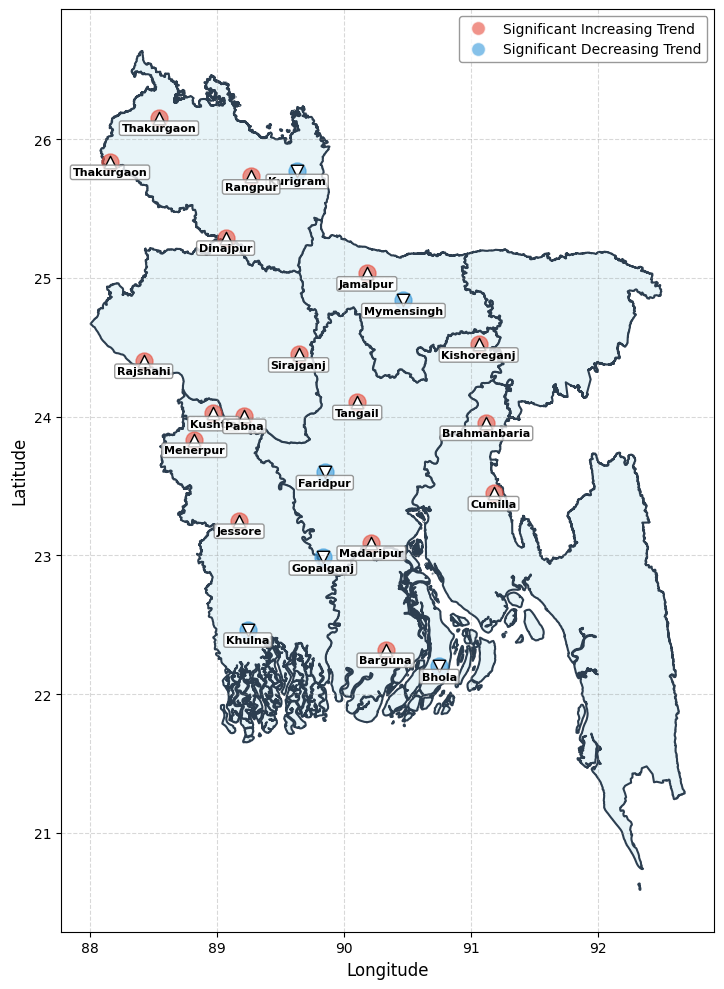

In [89]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load Bangladesh shapefile
bangladesh = gpd.read_file(
    r"E:\Downloads\bgd_adm_bbs_20201113_shp\bgd_adm_bbs_20201113_SHP\bgd_admbnda_adm1_bbs_20201113.shp"
)

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(
    results_df_seasonal,
    geometry=gpd.points_from_xy(results_df.lon, results_df.lat),
    crs="EPSG:4326"
)

# Set up figure
plt.style.use('default')
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor('white')

# Plot Bangladesh
bangladesh.plot(ax=ax, color='#e8f4f8', edgecolor='#2c3e50', linewidth=1.5)

# Add grid
ax.grid(True, alpha=0.3, linestyle='--', color='gray')

# Define colors
colors = {
    'increasing_sig': '#e74c3c',    # Red for significant increasing
    'decreasing_sig': '#3498db',    # Blue for significant decreasing
    'no_trend': '#95a5a6'          # Gray for no trend
}

# Plot data points - only significant trends
for i, row in gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    upazila = row['District']
    trend = row['trend']
    is_significant = row['h']
    
    # Only plot if significant
    if is_significant:
        if trend == 'increasing':
            # Red circle background with up triangle
            ax.scatter(x, y, s=150, c=colors['increasing_sig'], alpha=0.6, marker='o')
            ax.scatter(x, y, s=80, c='white', marker='^', edgecolors='black', linewidth=1)
        
        elif trend == 'decreasing':
            # Blue circle background with down triangle
            ax.scatter(x, y, s=150, c=colors['decreasing_sig'], alpha=0.6, marker='o')
            ax.scatter(x, y, s=80, c='white', marker='v', edgecolors='black', linewidth=1)
        
        # Add upazila name with better visibility
        ax.text(x, y-0.04, upazila, fontsize=8, ha='center', va='top', 
                color='black', fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8, edgecolor='gray'))

# Create legend - only significant trends
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colors['increasing_sig'], 
           alpha=0.6, markersize=10, label='Significant Increasing Trend', linestyle='None'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colors['decreasing_sig'], 
           alpha=0.6, markersize=10, label='Significant Decreasing Trend', linestyle='None'),
]

legend = ax.legend(handles=legend_elements, loc='upper right', frameon=True, 
                   facecolor='white', edgecolor='gray')

# Styling
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()